# ITEM-BASED recommender system

# Packages

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Dataset

In [2]:
data_skripsi=pd.read_csv('FIX_DATASKRIPSI_NEW.CSV', sep=';', encoding= 'unicode_escape')
data_skripsi

,No,User_id,User_Name,Item_id,Item_name,Rating,PostDate,Bintang_Hotel
0,1,2700,Hendra Hendra,1,Eastparc Hotel Yogyakarta,4.0,08/07/2020,5
1,2,832,AS,1,Eastparc Hotel Yogyakarta,4.2,30/08/2020,5
2,3,4380,NU,1,Eastparc Hotel Yogyakarta,5.0,12/02/2022,5
3,4,3483,Leny Wati,1,Eastparc Hotel Yogyakarta,5.0,11/01/2022,5
4,5,4116,Mujiburahman,1,Eastparc Hotel Yogyakarta,5.0,11/12/2021,5
...,...,...,...,...,...,...,...,...
12522,12523,2023,eric moeljono,110,Swiss-Belboutique Yogyakarta,5.0,22/04/2019,5
12523,12524,1252,christy cussoy,110,Swiss-Belboutique Yogyakarta,5.0,22/04/2019,5
12524,12525,4708,R,110,Swiss-Belboutique Yogyakarta,4.0,27/02/2019,5
12525,12526,1532,dewi martanti,110,Swiss-Belboutique Yogyakarta,4.8,04/02/2019,5


In [3]:
ratings=data_skripsi[['User_id','Item_id','Rating']]
ratings

,User_id,Item_id,Rating
0,2700,1,4.0
1,832,1,4.2
2,4380,1,5.0
3,3483,1,5.0
4,4116,1,5.0
...,...,...,...
12522,2023,110,5.0
12523,1252,110,5.0
12524,4708,110,4.0
12525,1532,110,4.8


In [4]:
hotel=data_skripsi[['Item_id','Item_name','PostDate', 'Bintang_Hotel']]
hotel

,Item_id,Item_name,PostDate,Bintang_Hotel
0,1,Eastparc Hotel Yogyakarta,08/07/2020,5
1,1,Eastparc Hotel Yogyakarta,30/08/2020,5
2,1,Eastparc Hotel Yogyakarta,12/02/2022,5
3,1,Eastparc Hotel Yogyakarta,11/01/2022,5
4,1,Eastparc Hotel Yogyakarta,11/12/2021,5
...,...,...,...,...
12522,110,Swiss-Belboutique Yogyakarta,22/04/2019,5
12523,110,Swiss-Belboutique Yogyakarta,22/04/2019,5
12524,110,Swiss-Belboutique Yogyakarta,27/02/2019,5
12525,110,Swiss-Belboutique Yogyakarta,04/02/2019,5


In [5]:
unique_user = ratings.User_id.nunique(dropna = True)
unique_hotel = ratings.Item_id.nunique(dropna = True)
print("number of unique user:")
print(unique_user)
print("number of unique hotel:")
print(unique_hotel)

number of unique user:
6622
number of unique hotel:
110


In [6]:
#Sparsity Data
total_ratings = unique_user*unique_hotel
rating_present = ratings.shape[0]

ratings_not_provided = total_ratings - rating_present 

print("ratings not provided berarti beberapa user tidak menginap dan memberikan rating di beberapa hotel")
print(ratings_not_provided)
print("Nilai Sparsity dari data :")
print(ratings_not_provided / total_ratings)

ratings not provided berarti beberapa user tidak menginap dan memberikan rating di beberapa hotel
715893
Nilai Sparsity dari data :
0.9828025040498614


# Exploratory Data Analysis (EDA)

In [7]:
# Deskripsikan dataset
data_skripsi.describe()

# Lihat informasi dataset
data_skripsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12527 entries, 0 to 12526
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             12527 non-null  int64  
 1   User_id        12527 non-null  int64  
 2   User_Name      12527 non-null  object 
 3   Item_id        12527 non-null  int64  
 4   Item_name      12527 non-null  object 
 5   Rating         12527 non-null  float64
 6   PostDate       12527 non-null  object 
 7   Bintang_Hotel  12527 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 783.1+ KB


In [8]:
# 1)plot ratings count which gives information about which rating(on scale of 0 t0 5) is more frequent
rating_hotel = pd.DataFrame(ratings.groupby('Rating').size(),columns=['count'])
rating_hotel

,count
Rating,
1.0,97
1.2,4
1.4,23
1.6,24
1.8,43
2.0,201
2.2,111
2.4,115
2.6,137


Jumlah untuk setiap rating


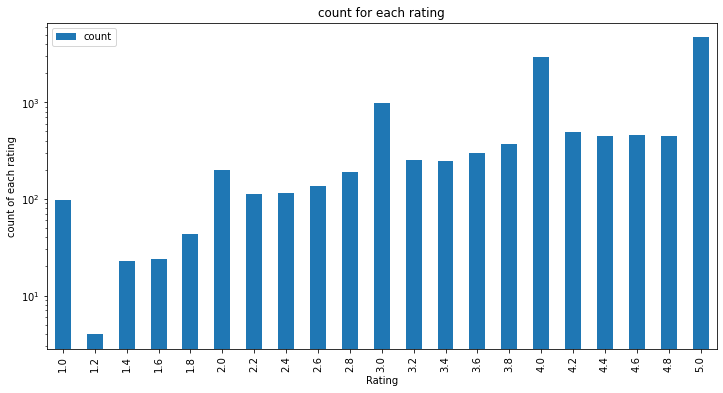

In [9]:
# plot a bar plot to visualise the ratings
rating_hotel_for_vis = rating_hotel
ax = rating_hotel_for_vis.reset_index().rename(columns = {'index':'Rating'}).plot(
    x='Rating',
    y='count',
    logy = True,
    kind='bar',
    title='count for each rating',
    figsize=(12,6)
)
ax.set_xlabel('Rating')
ax.set_ylabel('count of each rating')
print("Jumlah untuk setiap rating")

In [10]:
# 2) plot rating frequency of each hotel(how many time a movie has been rated)
hotel_freq = pd.DataFrame(ratings.groupby('Item_id').size(),columns=['count'])
hotel_freq.head()

,count
Item_id,
1,161
2,163
3,171
4,190
5,28


Text(0, 0.5, 'rating frequency')

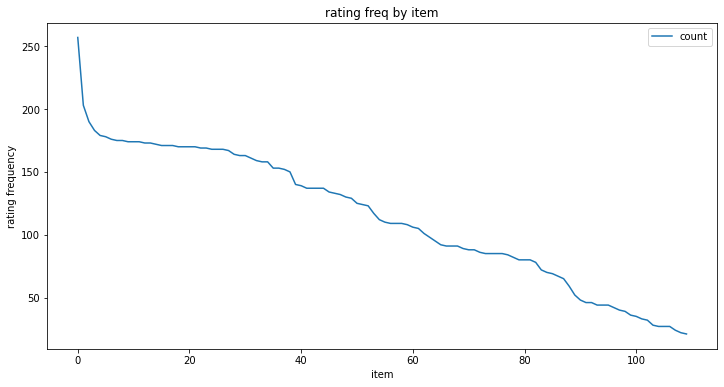

In [11]:
# plot rating freq
ax  = hotel_freq.sort_values('count',ascending=False).reset_index(drop=True).plot(
      title='rating freq by item',
      figsize=(12,6),
      
)
ax.set_xlabel("item")
ax.set_ylabel("rating frequency")

In [12]:
user_htl = pd.DataFrame(ratings.groupby('User_id').size(),columns=['count'])
user_htl.head()

,count
User_id,
1,18
2,1
3,1
4,1
5,68


Text(0, 0.5, 'rating frequency')

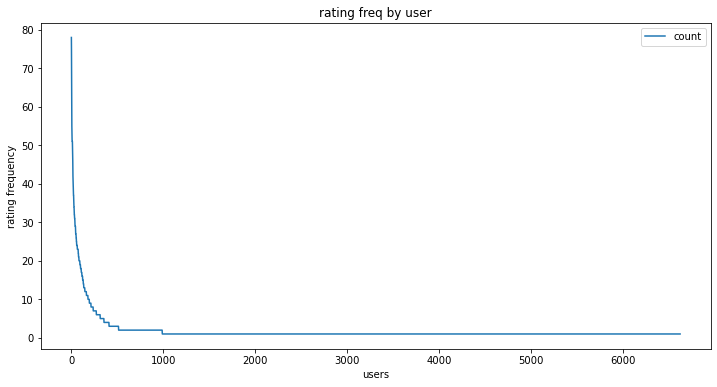

In [13]:
# plot rating freq
ax  = user_htl.sort_values('count',ascending=False).reset_index(drop=True).plot(
      title='rating freq by user',
      figsize=(12,6),
      
)
ax.set_xlabel("users")
ax.set_ylabel("rating frequency")

In [14]:
n_ratings = len(ratings)
n_hotel= ratings['Item_id'].nunique()
n_users = ratings['User_id'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique Item id: {n_hotel}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per hotel: {round(n_ratings/n_hotel, 2)}")

Number of ratings: 12527
Number of unique Item id: 110
Number of unique users: 6622
Average number of ratings per user: 1.89
Average number of ratings per hotel: 113.88


In [15]:
user_freq = ratings[['User_id', 'Item_id']].groupby('User_id').count().reset_index()
user_freq.columns = ['User_id', 'n_ratings']
user_freq.head()

,User_id,n_ratings
0,1,18
1,2,1
2,3,1
3,4,1
4,5,68


Text(0.5, 1.0, 'Distribution of hotel ratings')

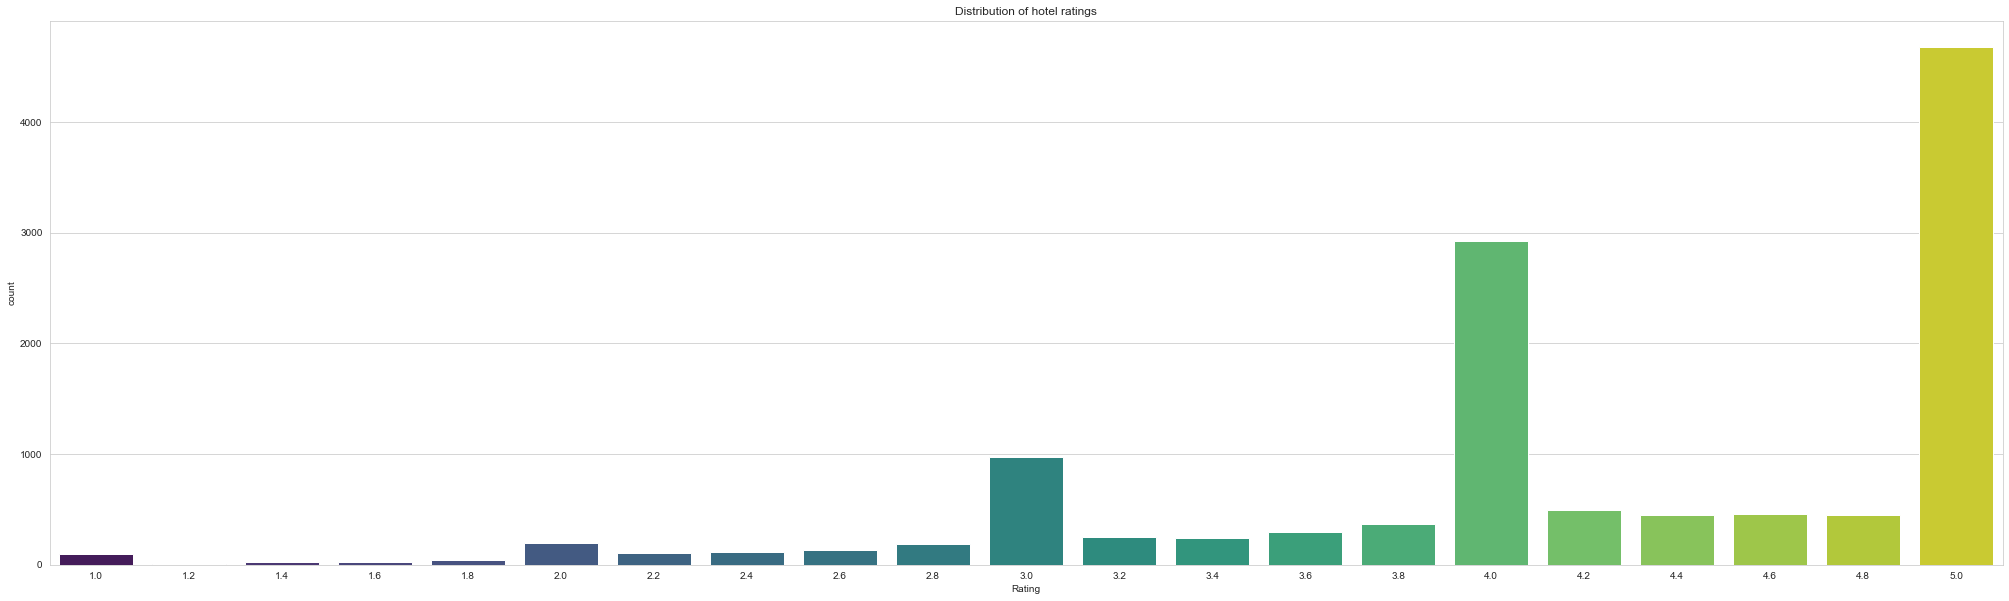

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(35,10))
plt.subplot()
ax = sns.countplot(x="Rating", data=ratings, palette="viridis")
plt.title("Distribution of hotel ratings")


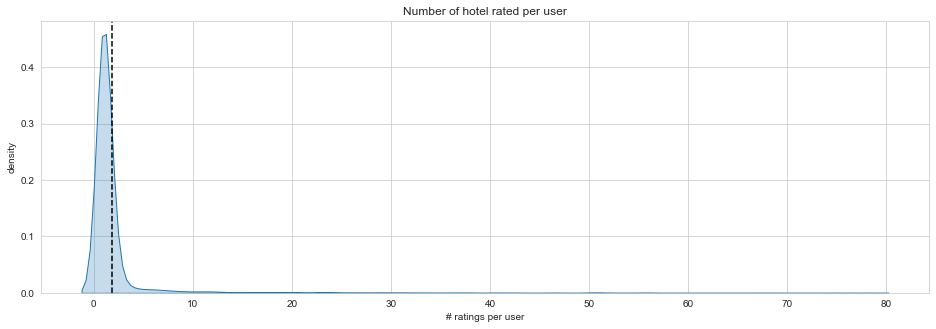

In [17]:
plt.figure(figsize=(35,5))
plt.subplot(1,2,1)
ax = sns.kdeplot(user_freq['n_ratings'], shade=True, legend=False)
plt.axvline(user_freq['n_ratings'].mean(), color="k", linestyle="--")
plt.xlabel("# ratings per user")
plt.ylabel("density")

plt.title("Number of hotel rated per user")
plt.show()

# MATRIX

In [18]:
#creating the user-item interaction matrix
data_matrix_kosong = data_skripsi.pivot_table(index='Item_name', columns='User_Name', values='Rating').fillna('Kosong')
data_matrix_kosong.head(10)

User_Name,A,A AGUSLIMI SHAFIRA PUTRI AP,A Dian Christianti,AA,AAN AMBARYATI,AB,ABDUL WAHAB ISKANDAR,AC,ACHMAT LUTHFI YAKIM,AD,...,yuri yah,yusuf satriyo,yuyun sutaji,yuzon erman,zahra azzahra,zainul arifin,zanni erdiawan saputra,zevina Liemahassana,ziah nur aisjah,zuraidah fitri lubis
Item_name,,,,,,,,,,,,,,,,,,,,,
@HOM Premiere Timoho,Kosong,Kosong,Kosong,5.0,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,...,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong
ARTOTEL Suites Bianti - Yogyakarta,Kosong,Kosong,Kosong,5.0,Kosong,3.0,Kosong,Kosong,Kosong,4.0,...,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong
Abadi Hotel Malioboro Yogyakarta by Tritama Hospitality,5.0,Kosong,Kosong,3.6,Kosong,2.0,Kosong,Kosong,Kosong,Kosong,...,Kosong,Kosong,Kosong,4.0,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong
Adhisthana Hotel,Kosong,Kosong,Kosong,5.0,Kosong,Kosong,Kosong,Kosong,Kosong,1.6,...,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong
Airlangga Hotel,Kosong,Kosong,Kosong,4.0,Kosong,Kosong,4.0,Kosong,Kosong,Kosong,...,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong
Allstay Ecotel Yogyakarta,Kosong,Kosong,Kosong,5.0,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,...,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong
Amaris Hotel Malioboro,Kosong,Kosong,Kosong,5.0,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,...,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong
Arte Hotel Malioboro Yogyakarta,Kosong,Kosong,Kosong,4.0,Kosong,5.0,Kosong,Kosong,Kosong,Kosong,...,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong
Atrium Premiere Hotel Yogyakarta Ambarukmo,Kosong,Kosong,Kosong,4.0,Kosong,5.0,Kosong,Kosong,Kosong,Kosong,...,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong


In [19]:
#creating the user-item interaction matrix
data_matrix = data_skripsi.pivot_table(index='Item_name', columns='User_Name', values='Rating').fillna(0)
data_matrix.head(10)

User_Name,A,A AGUSLIMI SHAFIRA PUTRI AP,A Dian Christianti,AA,AAN AMBARYATI,AB,ABDUL WAHAB ISKANDAR,AC,ACHMAT LUTHFI YAKIM,AD,...,yuri yah,yusuf satriyo,yuyun sutaji,yuzon erman,zahra azzahra,zainul arifin,zanni erdiawan saputra,zevina Liemahassana,ziah nur aisjah,zuraidah fitri lubis
Item_name,,,,,,,,,,,,,,,,,,,,,
@HOM Premiere Timoho,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARTOTEL Suites Bianti - Yogyakarta,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abadi Hotel Malioboro Yogyakarta by Tritama Hospitality,5.0,0.0,0.0,3.6,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
Adhisthana Hotel,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Airlangga Hotel,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allstay Ecotel Yogyakarta,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amaris Hotel Malioboro,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arte Hotel Malioboro Yogyakarta,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Atrium Premiere Hotel Yogyakarta Ambarukmo,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
data_matrix.values

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [4.4, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [21]:
#Similarity
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
#Item similarity matrix using cosine similarity
cosine_item=pd.DataFrame(cosine_similarity(data_matrix))
cosine_item

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,1.000000,0.102769,0.071427,0.074948,0.081729,0.131146,0.049907,0.065628,0.119561,0.097811,...,0.078976,0.112888,0.107634,0.056651,0.096725,0.020871,0.111399,0.099988,0.058598,0.033351
1,0.102769,1.000000,0.109714,0.135052,0.147633,0.140487,0.091509,0.088314,0.157835,0.095261,...,0.137890,0.087067,0.150062,0.072664,0.152954,0.070786,0.118272,0.125623,0.108371,0.071729
2,0.071427,0.109714,1.000000,0.138160,0.133725,0.143257,0.090488,0.132532,0.130830,0.075759,...,0.114351,0.124895,0.124484,0.058891,0.157907,0.070362,0.114140,0.122383,0.107199,0.109382
3,0.074948,0.135052,0.138160,1.000000,0.109055,0.186103,0.084607,0.129261,0.135809,0.091281,...,0.120021,0.145281,0.136190,0.131061,0.141229,0.047367,0.158327,0.145333,0.112636,0.112932
4,0.081729,0.147633,0.133725,0.109055,1.000000,0.180839,0.138003,0.075823,0.128638,0.089535,...,0.117068,0.117203,0.117988,0.119054,0.110959,0.056521,0.098710,0.113505,0.100561,0.043950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.020871,0.070786,0.070362,0.047367,0.056521,0.028805,0.051547,0.056050,0.056565,0.021105,...,0.054206,0.029373,0.044862,0.024950,0.059633,1.000000,0.039581,0.058590,0.014270,0.064034
106,0.111399,0.118272,0.114140,0.158327,0.098710,0.169402,0.082883,0.098281,0.111296,0.102414,...,0.123667,0.121276,0.128307,0.099071,0.104570,0.039581,1.000000,0.148207,0.091607,0.043837
107,0.099988,0.125623,0.122383,0.145333,0.113505,0.191085,0.107018,0.090183,0.174051,0.086165,...,0.109381,0.151816,0.122507,0.114567,0.122008,0.058590,0.148207,1.000000,0.090790,0.074626
108,0.058598,0.108371,0.107199,0.112636,0.100561,0.160638,0.101466,0.099992,0.102953,0.081630,...,0.087708,0.125603,0.138088,0.071894,0.101124,0.014270,0.091607,0.090790,1.000000,0.074103


In [23]:
###### create a mapper which maps hotel index and its title
hotel_drop = data_skripsi[['Item_id' , 'Item_name','Bintang_Hotel']]
hotel_drop

,Item_id,Item_name,Bintang_Hotel
0,1,Eastparc Hotel Yogyakarta,5
1,1,Eastparc Hotel Yogyakarta,5
2,1,Eastparc Hotel Yogyakarta,5
3,1,Eastparc Hotel Yogyakarta,5
4,1,Eastparc Hotel Yogyakarta,5
...,...,...,...
12522,110,Swiss-Belboutique Yogyakarta,5
12523,110,Swiss-Belboutique Yogyakarta,5
12524,110,Swiss-Belboutique Yogyakarta,5
12525,110,Swiss-Belboutique Yogyakarta,5


In [24]:
hotel_to_index=hotel_drop.drop_duplicates(['Item_id' , 'Item_name', 'Bintang_Hotel'])
hotel_to_index.head()

,Item_id,Item_name,Bintang_Hotel
0,1,Eastparc Hotel Yogyakarta,5
161,2,Grand Ambarrukmo Yogyakarta,4
324,3,Kotta GO Yogyakarta,3
495,4,Crystal Lotus Hotel Yogyakarta,4
685,5,Omah Manis Guesthouse Yogyakarta,3


In [25]:
index = {
    hotel_to_index:i for i,
    hotel_to_index in enumerate(list(hotel_to_index.set_index('Item_id').Item_name))
}

In [26]:
index

{'Eastparc Hotel Yogyakarta': 0,
 'Grand Ambarrukmo Yogyakarta': 1,
 'Kotta GO Yogyakarta': 2,
 'Crystal Lotus Hotel Yogyakarta': 3,
 'Omah Manis Guesthouse Yogyakarta': 4,
 'Grand Keisha Yogyakarta': 5,
 'Pulang ke Uttara': 6,
 'GAIA Cosmo Hotel': 7,
 'Hotel Tentrem Yogyakarta': 8,
 'Hotel Sumaryo': 9,
 'Harper Malioboro Yogyakarta by ASTON': 10,
 'Puri Langenarjan Guest House': 11,
 'The Alana Hotel & Conference Center Malioboro Yogyakarta by ASTON': 12,
 'The Manohara Hotel Yogyakarta': 13,
 'RedDoorz Plus @ Terban Residence': 14,
 'Lafayette Boutique Hotel': 15,
 'THE 1O1 Yogyakarta Tugu': 16,
 'KJ Hotel Yogyakarta': 17,
 'Yogyakarta Marriott Hotel': 18,
 'Abadi Hotel Malioboro Yogyakarta by Tritama Hospitality': 19,
 'Student Park Hotel': 20,
 'Brothers Inn Babarsari': 21,
 'Adhisthana Hotel ': 22,
 'ARTOTEL Suites Bianti - Yogyakarta': 23,
 'Prima In Hotel Malioboro': 24,
 'Unisi Hotel Malioboro - Jogja ( Syariah )': 25,
 'Atrium Premiere Hotel Yogyakarta Ambarukmo': 26,
 'Eclips

In [27]:
# custom function to create unique set of web series

def unique_items():
    unique_items_list = []
    for Item_name in data_skripsi.keys():
        for items in data_skripsi['Item_name']:
            unique_items_list.append(items)
    s=set(unique_items_list)
    unique_items_list=list(s)
    return unique_items_list

In [28]:
unique_items()

['Patra Malioboro Hotel',
 'EDU Hostel',
 'Melia Purosani Yogyakarta',
 'Harper Malioboro Yogyakarta by ASTON',
 'Hotel Pyrenees Jogja',
 'Paku Mas Hotel',
 "D'Senopati Malioboro Grand Hotel",
 'Airlangga Hotel',
 'Grand Mercure Yogyakarta Adi Sucipto',
 'Hotel Bladok & Restaurant',
 'Satoria Hotel Yogyakarta',
 'Horison Ultima Riss Malioboro Yogyakarta',
 'Grand Zuri Malioboro Yogyakarta',
 'Horison Lynn Hotel Yogyakarta',
 'Omah Manis Guesthouse Yogyakarta',
 'TONITEL Hotel Malioboro Yogyakarta',
 'Eastparc Hotel Yogyakarta',
 'Yellow Star Ambarrukmo Hotel ',
 'Hotel Adilla Syariah Ambarukmo',
 'THE 1O1 Yogyakarta Tugu',
 'Swiss-Belboutique Yogyakarta',
 'Allstay Ecotel Yogyakarta',
 'Malioboro Inn Yogyakarta',
 'Grand Keisha Yogyakarta',
 'KJ Hotel Yogyakarta',
 'Khas Malioboro (formerly Pesonna Hotel Malioboro)',
 'Omah Qu Guesthouse Malioboro',
 'Grand Tjokro Yogyakarta',
 'Burza Hotel Yogyakarta',
 'Hotel Sumaryo',
 'Hotel Dafam Fortuna Malioboro Yogyakarta',
 'Lafayette Boutique

# Get the k nearest neighbors of an item

In [29]:
# define the model
from sklearn.neighbors import NearestNeighbors

In [30]:
from scipy.sparse import csr_matrix

In [31]:
# create a sparse matrix for more efficient calculations
data_matriks_sparse = csr_matrix(data_matrix.values)

In [32]:
print(data_matriks_sparse)

  (0, 3)	5.0
  (0, 21)	5.0
  (0, 37)	3.2
  (0, 44)	5.0
  (0, 47)	5.0
  (0, 52)	3.2
  (0, 96)	3.8
  (0, 234)	3.0
  (0, 243)	4.4
  (0, 335)	3.0
  (0, 458)	3.0
  (0, 463)	4.0
  (0, 519)	3.0
  (0, 597)	4.8
  (0, 631)	5.0
  (0, 770)	5.0
  (0, 799)	5.0
  (0, 855)	3.0
  (0, 859)	3.0
  (0, 871)	4.0
  (0, 883)	2.8
  (0, 894)	4.0
  (0, 960)	4.0
  (0, 966)	5.0
  (0, 1012)	4.6
  :	:
  (109, 4685)	4.0
  (109, 4856)	5.0
  (109, 4873)	3.0
  (109, 5019)	4.8
  (109, 5057)	4.0
  (109, 5125)	4.0
  (109, 5157)	2.6
  (109, 5212)	2.0
  (109, 5384)	2.4
  (109, 5422)	2.6
  (109, 5508)	4.0
  (109, 5538)	4.0
  (109, 5553)	3.0
  (109, 5563)	3.0
  (109, 5578)	4.0
  (109, 5599)	5.0
  (109, 5615)	3.0
  (109, 5765)	3.8
  (109, 6085)	5.0
  (109, 6274)	4.4
  (109, 6289)	5.0
  (109, 6313)	3.2
  (109, 6411)	4.0
  (109, 6496)	5.0
  (109, 6542)	2.6


In [33]:
# define model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)
# fit
knn=model_knn.fit(data_matriks_sparse)

In [34]:
index

{'Eastparc Hotel Yogyakarta': 0,
 'Grand Ambarrukmo Yogyakarta': 1,
 'Kotta GO Yogyakarta': 2,
 'Crystal Lotus Hotel Yogyakarta': 3,
 'Omah Manis Guesthouse Yogyakarta': 4,
 'Grand Keisha Yogyakarta': 5,
 'Pulang ke Uttara': 6,
 'GAIA Cosmo Hotel': 7,
 'Hotel Tentrem Yogyakarta': 8,
 'Hotel Sumaryo': 9,
 'Harper Malioboro Yogyakarta by ASTON': 10,
 'Puri Langenarjan Guest House': 11,
 'The Alana Hotel & Conference Center Malioboro Yogyakarta by ASTON': 12,
 'The Manohara Hotel Yogyakarta': 13,
 'RedDoorz Plus @ Terban Residence': 14,
 'Lafayette Boutique Hotel': 15,
 'THE 1O1 Yogyakarta Tugu': 16,
 'KJ Hotel Yogyakarta': 17,
 'Yogyakarta Marriott Hotel': 18,
 'Abadi Hotel Malioboro Yogyakarta by Tritama Hospitality': 19,
 'Student Park Hotel': 20,
 'Brothers Inn Babarsari': 21,
 'Adhisthana Hotel ': 22,
 'ARTOTEL Suites Bianti - Yogyakarta': 23,
 'Prima In Hotel Malioboro': 24,
 'Unisi Hotel Malioboro - Jogja ( Syariah )': 25,
 'Atrium Premiere Hotel Yogyakarta Ambarukmo': 26,
 'Eclips

In [35]:
# fuzzy_hotel_name_matching
from fuzzywuzzy import fuzz

In [36]:
def fuzzy_matching(mapper, fav_hotel, verbose=True):
    """
    return the closest match via fuzzy ratio. 
    
    Parameters
    ----------    
    mapper: dict, map hotel item name to index of the hotel in data

    fav_movie: str, name of user input hotel
    
    verbose: bool, print log if True

    Return
    ------
    index of the closest match
    """
    match_hotel = []
    # get match
    for Item_name, index in mapper.items():
        ratio = fuzz.ratio(Item_name.lower(), fav_hotel.lower())
        if ratio >= 60:
            match_hotel.append((Item_name, index, ratio))
    # sort
    match_hotel = sorted(match_hotel, key=lambda x: x[2])[::-1]
    if not match_hotel:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_hotel]))
    return match_hotel[0][1]

In [37]:
def make_recommendation(model_knn, data, mapper, fav_hotel, n_recommendations):
    """
    return top n similar hotel recommendations based on user's input hotel


    Parameters
    ----------
    model_knn: sklearn model, knn model

    data: hotel-user matrix

    mapper: dict, map hotel title name to index of the hotel in data

    fav_hotel: str, name of user input hotel

    n_recommendations: int, top n recommendations

    Return
    ------
    list of top n similar hotel recommendations
    """
    
     # fit
    model_knn.fit(data)
    # get input hotel index
    print('Hotel yang anda suka:', fav_hotel)
    
    index = fuzzy_matching(mapper, fav_hotel,  verbose=True)

    distances, indices = model_knn.kneighbors(data[index],n_neighbors=n_recommendations+1)
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), 
                        distances.squeeze().tolist())), 
               key=lambda x: x[1])[:0:-1]
    
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    
    # print recommendations
    print('Rekomendasi untuk {}:'.format(fav_hotel))
    for i, (index, dist) in enumerate(raw_recommends):
        print('{0}: {1}, dengan similary yaitu {2}'.format(i+1, reverse_mapper[index], dist))

In [38]:
hotel = 'Eastparc Hotel Yogyakarta'

make_recommendation(model_knn=model_knn, 
                    data=data_matriks_sparse, 
                    fav_hotel= hotel, 
                    mapper=index, 
                    n_recommendations=5)

Hotel yang anda suka: Eastparc Hotel Yogyakarta
Found possible matches in our database: ['Eastparc Hotel Yogyakarta', 'Zest Hotel Yogyakarta', 'Tara Hotel Yogyakarta', 'Satoria Hotel Yogyakarta', 'Kalya Hotel Yogyakarta', 'Allstay Ecotel Yogyakarta', 'The Manohara Hotel Yogyakarta', 'Puri Artha Hotel Yogyakarta', 'Grove Hotel Yogyakarta', 'Burza Hotel Yogyakarta', 'KJ Hotel Yogyakarta', 'Top Malioboro Hotel Yogyakarta', 'Forriz Hotel Yogyakarta', 'Crystal Lotus Hotel Yogyakarta', 'Hotel Ibis Yogyakarta', 'Nueve Malioboro Hotel Yogyakarta', 'POP! Hotel Timoho Yogyakarta', 'Arte Hotel Malioboro Yogyakarta', 'Kotta GO Yogyakarta', 'Horison Lynn Hotel Yogyakarta', 'Jambuluwuk Malioboro Hotel Yogyakarta', 'Hotel Tentrem Yogyakarta', 'Melia Purosani Yogyakarta', 'Grand Senyum Hotel Tugu Yogyakarta', 'Hotel Indah Palace Yogyakarta', 'DKayon Hotel Demangan Yogyakarta', 'Atrium Premiere Hotel Yogyakarta Ambarukmo', 'Sahid Raya Hotel & Convention Yogyakarta', 'Grand Tjokro Yogyakarta', 'TONITEL 

# Get the top-N recommendations For User

In [39]:
df = data_skripsi.pivot_table(index='Item_name', columns='User_Name', values='Rating').fillna(0)
df1 = df.copy()
df1

User_Name,A,A AGUSLIMI SHAFIRA PUTRI AP,A Dian Christianti,AA,AAN AMBARYATI,AB,ABDUL WAHAB ISKANDAR,AC,ACHMAT LUTHFI YAKIM,AD,...,yuri yah,yusuf satriyo,yuyun sutaji,yuzon erman,zahra azzahra,zainul arifin,zanni erdiawan saputra,zevina Liemahassana,ziah nur aisjah,zuraidah fitri lubis
Item_name,,,,,,,,,,,,,,,,,,,,,
@HOM Premiere Timoho,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARTOTEL Suites Bianti - Yogyakarta,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abadi Hotel Malioboro Yogyakarta by Tritama Hospitality,5.0,0.0,0.0,3.6,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
Adhisthana Hotel,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Airlangga Hotel,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Votel Maerakatja Yogyakarta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YATS Colony,0.0,0.0,0.0,3.2,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yellow Star Ambarrukmo Hotel,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
user_index = df1.columns.tolist()
user_index

['A',
 'A AGUSLIMI SHAFIRA PUTRI AP',
 'A Dian Christianti',
 'AA',
 'AAN AMBARYATI',
 'AB',
 'ABDUL WAHAB ISKANDAR',
 'AC',
 'ACHMAT LUTHFI YAKIM',
 'AD',
 'ADI PRANTA SEMBIRING KALOKO',
 'ADIADHA TRI ARIPRADINA pradina',
 'ADIANTO ADIANTO',
 'ADITYA APRIANTA',
 'ADNI MAIWASTIWI',
 'AE',
 'AF',
 'AFAN OKKY',
 'AFIAT NELLY',
 'AG',
 'AGENG PRATIWI',
 'AH',
 'AHMAD FIRDAUS',
 'AI',
 'AJ',
 'AJIANTO MULYAWAN',
 'AK',
 'AKBAR PRANANTA',
 'AL',
 'AL FATH FILSAFAH',
 'ALEX HENDRA SIREGAR',
 'ALFA SHALATINE TEWA',
 'AM',
 'AMC Hermawan Harry Nugroho',
 'AMELIA Dwi Rara Adistha',
 'AN',
 'ANDREANI SUCIANI TANZIHAH',
 'ANDRI SAPUTRO',
 'ANDRIANA KUMALA DEWI',
 'ANDRIE DARMA NUGROHO',
 'ANDY ANDY',
 'ANGGA KUSUMA WARDANA',
 'ANIS SETYANI',
 'ANITA DWI ASTUTI',
 'ANTONIUS FERNANDO KUSWARA',
 'ANWAR ANWAR',
 'AO',
 'AP',
 'AQ',
 'AQNI Hanifa',
 'AR',
 'ARIE SAEPULLOH',
 'ARIF BAYU AJI',
 'ARIFIN MAKFUL',
 'ARIS ARIYANTO',
 'ARNO ALAM',
 'ARTIKA Sutopo',
 'ARYA JABAR',
 'AS',
 'AT',
 'AU',
 'AULIA

In [41]:
def recommend_hotels(user, num_recommended_hotel):

  print('Hotel yang sudah diberikan rating oleh {} yaitu \n'.format(user))

  for m in df[df[user] > 0][user].index.tolist():
    print(m)
  
  print('\n')

  recommended_hotel = []

  for m in df[df[user] == 0].index.tolist():

    index_df = df.index.tolist().index(m)
    predicted_rating = df1.iloc[index_df, df1.columns.tolist().index(user)]
    recommended_hotel.append((m, predicted_rating))

  sorted_rm = sorted(recommended_hotel, key=lambda x:x[1], reverse=True)
  
  print('Hasil rekomendasinya yaitu \n')
  rank = 1
  for recommended_hotel in sorted_rm[:num_recommended_hotel]:
    
    print('{}: {} - dengan prediksi rating: {}'.format(rank, recommended_hotel[0], recommended_hotel[1]))
    rank = rank + 1

In [42]:
def hotels_recommender(user, num_neighbors, num_recommendation):
  
  number_neighbors = num_neighbors

  knn = NearestNeighbors(metric='cosine', algorithm='brute')
  knn.fit(df.values)
  distances, indices = knn.kneighbors(df.values, n_neighbors=number_neighbors)

  user_index = df.columns.tolist().index(user)

  for m,t in list(enumerate(df.index)):
    if df.iloc[m, user_index] == 0:
      sim_hotels = indices[m].tolist()
      hotels_distances = distances[m].tolist()
    
      if m in sim_hotels:
        id_hotels = sim_hotels.index(m)
        sim_hotels.remove(m)
        hotels_distances.pop(id_hotels) 

      else:
        sim_hotels = sim_hotels[:num_neighbors-1]
        hotels_distances = hotels_distances[:num_neighbors-1]
           
      hotels_similarity = [1-x for x in hotels_distances]
      hotels_similarity_copy = hotels_similarity.copy()
      nominator = 0

      for s in range(0, len(hotels_similarity)):
        if df.iloc[sim_hotels[s], user_index] == 0:
          if len(hotels_similarity_copy) == (number_neighbors - 1):
            hotels_similarity_copy.pop(s)
          
          else:
            hotels_similarity_copy.pop(s-(len(hotels_similarity)-len(hotels_similarity_copy)))
            
        else:
          nominator = nominator + hotels_similarity[s]*df.iloc[sim_hotels[s],user_index]
          
      if len(hotels_similarity_copy) > 0:
        if sum(hotels_similarity_copy) > 0:
          predicted_r = nominator/sum(hotels_similarity_copy)
        
        else:
          predicted_r = 0

      else:
        predicted_r = 0
        
      df1.iloc[m,user_index] = predicted_r
  recommend_hotels(user,num_recommendation)

In [43]:
hotels_recommender('Afni Manopo', 5, 10)

Hotel yang sudah diberikan rating oleh Afni Manopo yaitu 

Khas Malioboro (formerly Pesonna Hotel Malioboro)


Hasil rekomendasinya yaitu 

1: Adhisthana Hotel  - dengan prediksi rating: 4.0
2: Brothers Inn Babarsari - dengan prediksi rating: 4.0
3: Forriz Hotel Yogyakarta - dengan prediksi rating: 4.0
4: Grand Kangen Hotel Urip Sumoharjo Yogyakarta - dengan prediksi rating: 4.0
5: Hotel Bladok & Restaurant - dengan prediksi rating: 4.0
6: Ibis Yogyakarta Adi Sucipto - dengan prediksi rating: 4.0
7: Jambuluwuk Malioboro Hotel Yogyakarta - dengan prediksi rating: 4.0
8: Kalya Hotel Yogyakarta - dengan prediksi rating: 4.0
9: Kotta GO Yogyakarta - dengan prediksi rating: 4.0
10: Lafayette Boutique Hotel - dengan prediksi rating: 4.0


# EVALUASI PREDIKSI

Evaluation with Mean Absolute Error

In [63]:
data_matrikss= data_matrix.values
print(data_matrikss)

[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [5.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [4.4 0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


In [54]:
cosine_jarak= cosine_item.values
print(cosine_jarak)

[[1.         0.10276875 0.07142696 ... 0.09998804 0.05859789 0.03335083]
 [0.10276875 1.         0.10971407 ... 0.1256225  0.10837055 0.07172855]
 [0.07142696 0.10971407 1.         ... 0.12238344 0.10719871 0.10938218]
 ...
 [0.09998804 0.1256225  0.12238344 ... 1.         0.09078968 0.07462562]
 [0.05859789 0.10837055 0.10719871 ... 0.09078968 1.         0.07410293]
 [0.03335083 0.07172855 0.10938218 ... 0.07462562 0.07410293 1.        ]]


In [65]:
distances, indices = knn.kneighbors(df.values, n_neighbors=3)

In [67]:
indices

array([[  0,  36,  61],
       [  1,  36,  52],
       [  2, 104,  36],
       [  3,   5,  60],
       [  4,   5,  36],
       [  5,   8,  59],
       [  6,  36,  15],
       [  7, 101,  22],
       [  8,   5,  41],
       [  9,  31,  36],
       [ 10,  86,  19],
       [ 11,  12, 103],
       [ 12,  60, 101],
       [ 13,  20,  70],
       [ 14, 102,  59],
       [ 15,   5,   6],
       [ 16, 102,  14],
       [ 17,  78,  12],
       [ 18,   5,  22],
       [ 19,  18,  88],
       [ 20,  13,  61],
       [ 21,  36,  40],
       [ 22,  36,  18],
       [ 23,   5,  41],
       [ 24,  59,  36],
       [ 25,  60,  16],
       [ 26, 104,  64],
       [ 27, 102,  12],
       [ 28,  59,  12],
       [ 29,   5,  36],
       [ 30,  60,  41],
       [ 31,  36,  59],
       [ 32,  37,  36],
       [ 33,   5, 100],
       [ 34,  84,  67],
       [ 35,   5,  58],
       [ 36,  80,  61],
       [ 37,  96,   5],
       [ 38,  22,   8],
       [ 39,   8,  73],
       [ 40,  12, 102],
       [ 41,  36

In [66]:
distances

array([[0.00000000e+00, 8.57143344e-01, 8.61105457e-01],
       [2.55351296e-15, 8.18407468e-01, 8.42045338e-01],
       [5.55111512e-16, 8.42093163e-01, 8.42219922e-01],
       [5.55111512e-16, 8.13897046e-01, 8.16537256e-01],
       [1.22124533e-15, 8.19161261e-01, 8.37968409e-01],
       [0.00000000e+00, 7.89028240e-01, 8.02324090e-01],
       [5.55111512e-16, 8.54896584e-01, 8.56962184e-01],
       [0.00000000e+00, 8.44505915e-01, 8.48751884e-01],
       [8.88178420e-16, 7.89028240e-01, 8.06766072e-01],
       [0.00000000e+00, 8.39067391e-01, 8.65763885e-01],
       [0.00000000e+00, 8.84273828e-01, 8.98088913e-01],
       [0.00000000e+00, 8.30688528e-01, 8.32608988e-01],
       [2.22044605e-16, 7.74516902e-01, 7.82355044e-01],
       [0.00000000e+00, 8.55938673e-01, 8.83356736e-01],
       [0.00000000e+00, 8.24268325e-01, 8.26317838e-01],
       [2.22044605e-16, 8.40481552e-01, 8.56962184e-01],
       [1.11022302e-15, 8.20852101e-01, 8.33244332e-01],
       [0.00000000e+00, 8.37648

In [70]:
#Rumus Distances=1-SimilarityCosine(A,B)
distances_item =1-distances
print(distances_item)

[[1.         0.14285666 0.13889454]
 [1.         0.18159253 0.15795466]
 [1.         0.15790684 0.15778008]
 [1.         0.18610295 0.18346274]
 [1.         0.18083874 0.16203159]
 [1.         0.21097176 0.19767591]
 [1.         0.14510342 0.14303782]
 [1.         0.15549409 0.15124812]
 [1.         0.21097176 0.19323393]
 [1.         0.16093261 0.13423611]
 [1.         0.11572617 0.10191109]
 [1.         0.16931147 0.16739101]
 [1.         0.2254831  0.21764496]
 [1.         0.14406133 0.11664326]
 [1.         0.17573167 0.17368216]
 [1.         0.15951845 0.14303782]
 [1.         0.1791479  0.16675567]
 [1.         0.16235197 0.14631377]
 [1.         0.18145156 0.16828168]
 [1.         0.16757159 0.15240879]
 [1.         0.14406133 0.14218302]
 [1.         0.16344479 0.15506687]
 [1.         0.1845055  0.16828168]
 [1.         0.14689322 0.14412334]
 [1.         0.11838548 0.11780352]
 [1.         0.12907396 0.12547038]
 [1.         0.19650441 0.15980044]
 [1.         0.15528272 0.15

In [76]:
np.array([np.abs(distances_item.T).sum(axis=1)]).T

array([[110.        ],
       [ 17.75968015],
       [ 16.74418793]])

In [75]:
distances_item.T.dot(data_matrix.values)

array([[74.8       ,  3.        ,  4.        , ...,  4.2       ,
         3.        ,  5.        ],
       [12.53848068,  0.34594169,  0.60923854, ...,  0.67591696,
         0.53918646,  0.53682857],
       [11.96023854,  0.34370734,  0.5676399 , ...,  0.56379168,
         0.53767572,  0.50080662]])

In [77]:
prediksi=distances_item.T.dot(data_matrix.values)/np.array([np.abs(distances_item.T).sum(axis=1)]).T
print(prediksi)

[[0.68       0.02727273 0.03636364 ... 0.03818182 0.02727273 0.04545455]
 [0.70600825 0.01947905 0.03430459 ... 0.03805907 0.03036014 0.03022738]
 [0.71429194 0.02052696 0.03390071 ... 0.03367089 0.03211119 0.02990928]]


In [79]:
ground_truth = data_matrix.T.values[distances_item.argsort()[0]]
ground_truth

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 3. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. ,

In [94]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [95]:
def rmse(prediksi,ground_truth):
    prediksi=prediksi[ground_truth.nonzero()].flatten()
    ground_truth=ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediksi,ground_truth))

In [96]:
error_rate=rmse(prediksi,ground_truth)
print("Accuracy: {:.3f}".format(100-error_rate))
print("RMSE: {:.5f}".format(error_rate))

Accuracy: 96.176
RMSE: 3.82449


https://github.com/yjeong5126/movie_recommender/blob/master/item_based_collaborative_filtering/item_based_collaborative_filtering.ipynb